<center><h1><font color=yellow><i> Deep Learning </i></font></h1></center>

# $Import$ $Libraries$ :

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import keras_tuner
import seaborn as sns

# $Data$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Import **data** (pandas dataframe). 

In [67]:
df_ozone=pd.read_csv('ozone_complet_preprocessed.csv')
df_ozone.drop('Unnamed: 0', axis=1, inplace=True)
df_ozone.head()

,date,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,...,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v,maxO3l,day_of_week,month,year
0,1995-04-01,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,...,340.0,4.0,20.0,4.0,-3.4641,62.2,56.2,5,4,1995
1,1995-04-02,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,...,110.0,1.0,350.0,2.0,0.0000,47.6,61.8,6,4,1995
2,1995-04-03,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,...,170.0,2.0,170.0,3.0,-0.3420,56.2,50.8,0,4,1995
3,1995-04-04,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,...,350.0,3.0,350.0,4.0,-0.5209,61.8,59.8,1,4,1995
4,1995-04-05,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,...,320.0,3.0,350.0,4.0,-0.9848,50.8,53.4,2,4,1995


<b><font color="skyblue">Step 2:</font></b>
 
- Vérificarion des valeurs nulles

In [31]:
# Vérification des valeurs manquantes dans votre DataFrame 'X'
missing_values = df_ozone.isnull().sum()

# Affichage des colonnes avec des valeurs manquantes
print("Colonnes avec des valeurs manquantes :")
print(missing_values[missing_values > 0])

Colonnes avec des valeurs manquantes :
maxO3     21
T6         1
T9         1
T12        1
T15        1
T18        1
Ne6        2
Ne9        2
Ne12       2
Ne15       2
Ne18       5
Vdir6      1
Vvit6      1
Vdir9      1
Vvit9      1
Vdir12     1
Vvit12     1
Vdir15     1
Vvit15     1
Vdir18     1
Vvit18     1
Vx         1
maxO3v    30
dtype: int64


<b><font color="skyblue">Step 3:</font></b>

Vérification des valeurs abérantes 


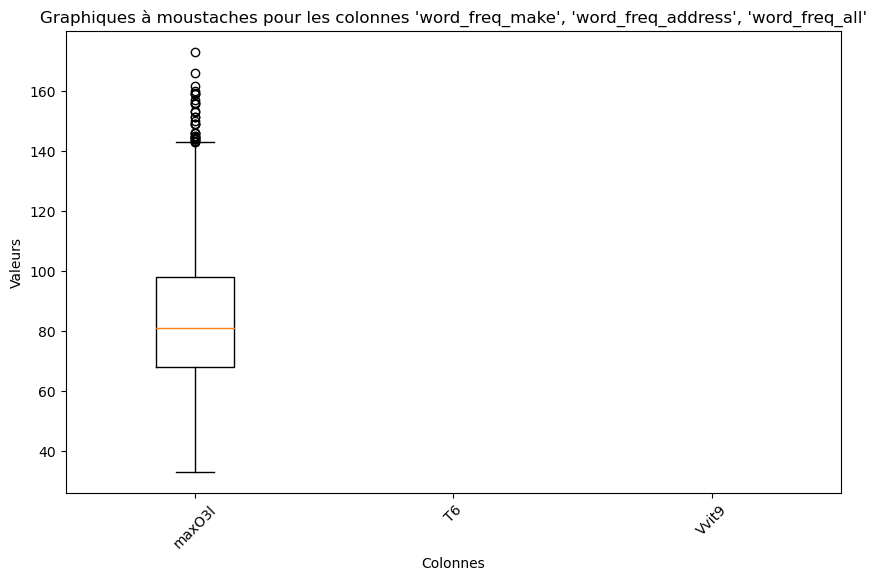

In [32]:
# Supposons que vous souhaitez visualiser plusieurs colonnes en même temps
columns_to_plot = ['maxO3l', 'T6', 'Vvit9']  # Ajoutez les colonnes à visualiser

plt.figure(figsize=(10, 6))
plt.boxplot([df_ozone[col] for col in columns_to_plot], labels=columns_to_plot)
plt.title("Graphiques à moustaches pour les colonnes 'word_freq_make', 'word_freq_address', 'word_freq_all'")
plt.xlabel("Colonnes")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.show()


--> Nous avons beacoup de valeur, mais ceci est normal dans notre cas car : dans le cas des fréquences de mots, la variation des valeurs peut être significative, ce qui peut conduire à des valeurs aberrantes. Ces valeurs ne sont pas nécessairement des erreurs ou des données corrompues, mais plutôt des manifestations de la diversité et de la variabilité des données linguistiques

<b><font color="skyblue">Step :4</font></b>
 
- Separate the output (the column `spam`) and the input (the other columns). 

In [68]:
y=df_ozone['maxO3l']
X=df_ozone.drop('maxO3l',axis=1)

In [34]:
X.head()

,date,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,...,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
0,19950401,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,...,290.0,4.0,300.0,4.0,340.0,4.0,20.0,4.0,-3.4641,62.2
1,19950402,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,...,160.0,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0.0000,47.6
2,19950403,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,...,20.0,2.0,340.0,1.0,170.0,2.0,170.0,3.0,-0.3420,56.2
3,19950404,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,...,10.0,4.0,350.0,3.0,350.0,3.0,350.0,4.0,-0.5209,61.8
4,19950405,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,...,340.0,2.0,280.0,1.0,320.0,3.0,350.0,4.0,-0.9848,50.8


In [35]:
X.describe()

,date,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,...,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
count,1.390000e+03,1369.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1388.000000,1388.000000,1388.000000,...,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1360.000000
mean,1.998604e+07,84.928269,12.303096,16.388913,19.420806,20.346364,18.783153,4.998559,5.159942,5.337176,...,195.766739,3.732901,205.017999,4.508279,208.351332,4.782577,190.820734,4.392369,-0.747871,85.037059
std,2.322672e+04,23.319656,3.900146,4.129406,4.927963,5.271608,5.080891,2.911083,2.565999,2.316706,...,107.133560,1.873504,105.910096,2.057032,110.604589,2.063882,121.461633,1.766066,3.402245,23.320063
min,1.995040e+07,33.200000,-1.600000,4.500000,3.900000,6.500000,4.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.392300,33.200000
25%,1.996091e+07,68.000000,10.000000,13.800000,16.200000,16.800000,15.500000,2.000000,3.000000,4.000000,...,100.000000,2.000000,110.000000,3.000000,100.000000,3.000000,60.000000,3.000000,-3.064200,68.000000
50%,1.999042e+07,80.400000,12.700000,16.700000,19.400000,20.400000,18.600000,6.000000,6.000000,6.000000,...,210.000000,4.000000,220.000000,4.000000,230.000000,5.000000,220.000000,4.000000,-1.026100,81.000000
75%,2.001041e+07,98.000000,15.100000,19.000000,22.600000,23.800000,22.000000,8.000000,7.000000,7.000000,...,290.000000,5.000000,300.000000,6.000000,300.000000,6.000000,290.000000,6.000000,1.500000,98.000000
max,2.002093e+07,173.000000,21.700000,28.600000,33.500000,35.500000,34.100000,9.000000,9.000000,8.000000,...,360.000000,12.000000,360.000000,12.000000,360.000000,16.000000,360.000000,12.000000,10.832900,173.000000


In [36]:
X.columns

Index(['date', 'maxO3', 'T6', 'T9', 'T12', 'T15', 'T18', 'Ne6', 'Ne9', 'Ne12',
       'Ne15', 'Ne18', 'Vdir6', 'Vvit6', 'Vdir9', 'Vvit9', 'Vdir12', 'Vvit12',
       'Vdir15', 'Vvit15', 'Vdir18', 'Vvit18', 'Vx', 'maxO3v'],
      dtype='object')

<b><font color="skyblue">Step 3:</font></b>
 
- Split our data into **train data** (80% -- 3680 rows) and **test data** (921 rows). 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Analyse des corrélations 

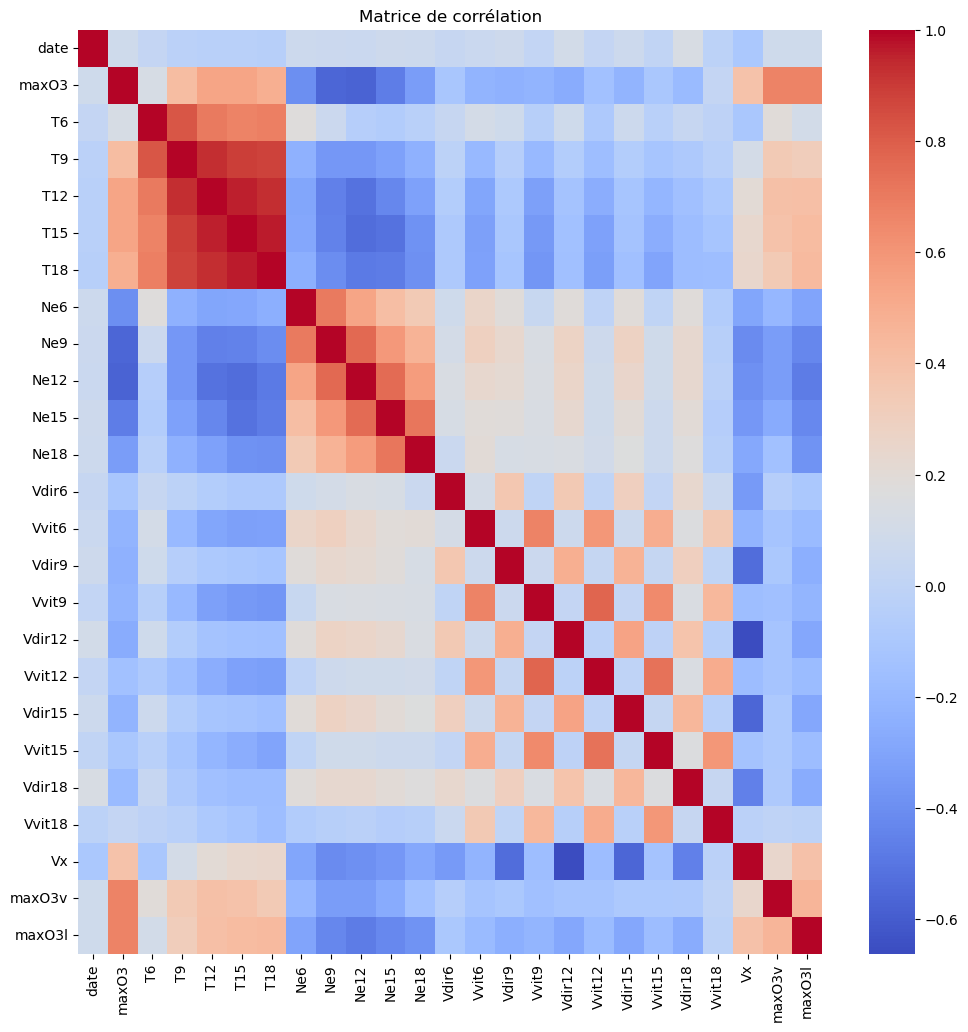

In [38]:
# Calcul de la matrice de corrélation
correlation_matrix = df_ozone.corr()

# Création de la carte de chaleur pour visualiser la matrice de corrélation
plt.figure(figsize=(12, 12))  # Ajustez la taille de la figure selon vos préférences
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")  # Crée la carte de chaleur avec les annotations des valeurs et une palette de couleurs
plt.title('Matrice de corrélation')  # Ajoute un titre à la carte de chaleur
plt.show()

PCA

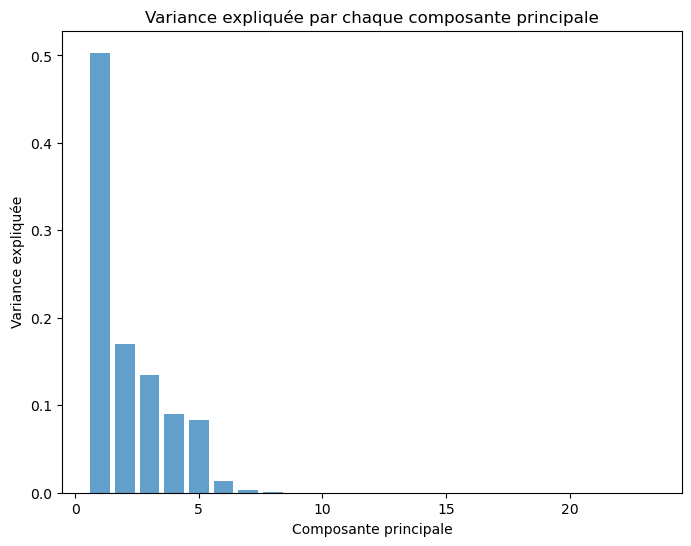

In [43]:
from sklearn.decomposition import PCA

# Appliquez PCA pour réduire la dimensionnalité et obtenir les composantes principales
pca = PCA()
X_pca=X.drop('date',axis=1)
X_pca=X_pca.dropna()
X_pca = pca.fit_transform(X_pca)

# Calcul de la variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Affichage de la variance expliquée par chaque composante principale sous forme de graphique
plt.figure(figsize=(8, 6))  # Ajustez la taille de la figure selon vos préférences
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par chaque composante principale')
plt.show()

In [44]:
X_pca.shape

(1346, 23)

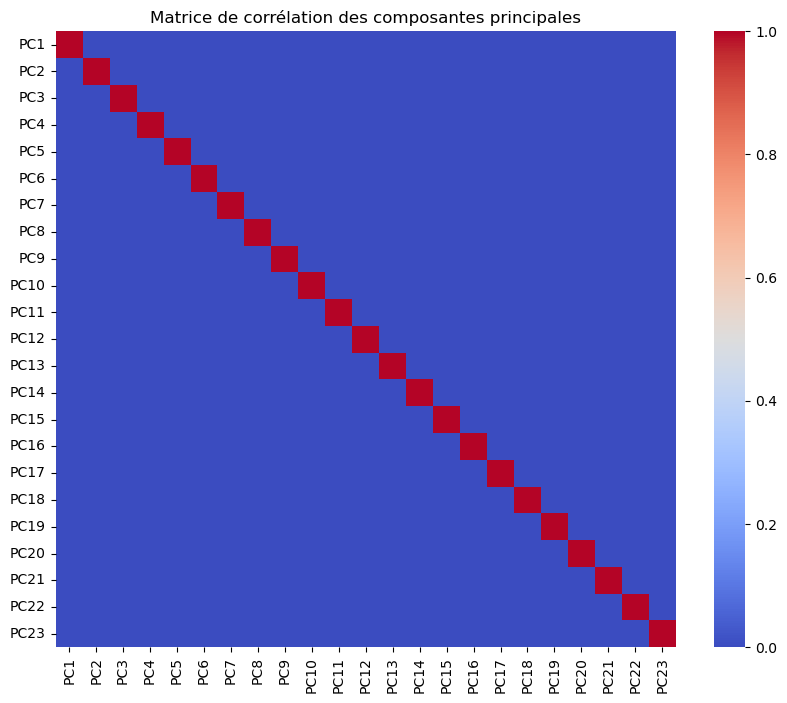

In [45]:
# Créer un DataFrame pour les composantes principales
pca_components = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

# Calculer la matrice de corrélation des composantes principales
correlation_matrix_pca = pca_components.corr()

# Afficher la matrice de corrélation des composantes principales
#print(correlation_matrix_pca)

# Afficher une heatmap pour visualiser la matrice de corrélation

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pca, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des composantes principales')
plt.show()

On peut remarquer que les composantes de PCA sont non corrélé 

# $DNN$

## $Building$ $our$ $Model$ : (Keras sans optimization des hyperparamètres)

In [70]:
X.drop('date',axis=1,inplace=True)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

<b><font color="skyblue">Step 1:</font></b>
 
- Creation of our model using **Keras**.

In [72]:
model1 = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[X.shape[1]], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.Dense(100, activation='relu', name='hidden_layer2'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear', name='output_layer'),  # Changement de l'activation en 'sigmoid'
])

In [73]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 100)               2700      
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                      

<b><font color="skyblue">Step 2:</font></b>
 
- Precise the `optimizer`, the `loss-fonction` & the `metric`.

In [74]:
model1.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy'],
)

<b><font color="skyblue">Step 3:</font></b>
 
- Train the model.

In [75]:
X.shape

(1390, 26)

In [77]:
hist = model1.fit(X_train,
                 y_train,
                 batch_size=32,
                 epochs=50,
                 validation_data=(X_test,y_test))

Epoch 1/50
 1/35 [..............................] - ETA: 0s - loss: 641.7797 - accuracy: 0.0000e+00

35/35 [==============================] - 0s 8ms/step - loss: 546.7838 - accuracy: 0.0000e+00 - val_loss: 529.1959 - val_accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 546.8863 - accuracy: 0.0000e+00 - val_loss: 528.1322 - val_accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 546.9853 - accuracy: 0.0000e+00 - val_loss: 527.9836 - val_accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 547.0304 - accuracy: 0.0000e+00 - val_loss: 527.2991 - val_accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 546.9584 - accuracy: 0.0000e+00 - val_loss: 526.5241 - val_accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 546.6541 - accuracy: 0.0000e+00 - val_loss: 527.0084 - val_accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 546.6974 - accuracy: 0.0000

In [81]:
mse = model1.evaluate(X_test, y_test)
print(f'Mean Squared Error on test set: {np.sqrt(mse)}')

9/9 [==============================] - 0s 4ms/step - loss: 527.4404 - accuracy: 0.0000e+00
Mean Squared Error on test set: [22.96607127  0.        ]


In [18]:
history_df = pd.DataFrame(hist.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.699730,0.657609,0.585456,0.691576
1,0.627485,0.694973,0.603519,0.649457
2,0.598390,0.695312,0.587871,0.664402
3,0.553965,0.717391,0.566860,0.684783
4,0.547994,0.716712,0.566314,0.671196


We'll plot the curve of the loss function (for training and validation) as a function of the number of epochs

Minimum validation loss: 0.21934057772159576


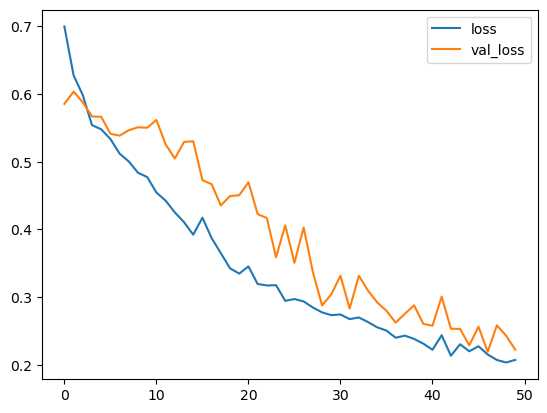

In [19]:
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## $Keras$ $tuner$ : (Le deuxième modèle en optimisant les hyperparamètres)

Dans cette partie, nous allons utiliser **Keras Tuner** pour effectuer une recherche d'hyperparamètres pour un modèle de réseau de neurones. Le but de cette parrtie est de trouver les meilleures **valeurs** d'hyperparamètres pour maximiser la précision (`accuracy`) du modèle sur un ensemble de validation.

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [57]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import accuracy_score

def build_model(hp):
    """
    Fonction construisant et configurant un modèle de réseau de neurones 
    en fonction des hyperparamètres spécifiés.

    Parameters 
    ----------
    hp : de type HyperParameters fourni par Keras Tuner. Il est utilisé pour spécifier les valeurs des hyperparamètres du modèle. 

    Returns
    -------
    model : est une instance de Sequential dans Keras, représentant le modèle de réseau de neurones configuré avec les 
    hyperparamètres spécifiés.
    """

    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=150, max_value=300, step=20),
                           activation='relu', input_shape=[57], name='hidden_layer1'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=hp.Int('units2', min_value=100, max_value=200, step=20),
                           activation='relu', name='hidden_layer2'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))

    model.compile(
        optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', values=[1e-2, 1e-1])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )


    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Choisissez le nombre d'essais que vous voulez
    executions_per_trial=3,  # Nombre d'exécutions par essai pour réduire la variabilité
    directory='my_dir2',
    project_name='keras_tuner2'
)

print('Le résumé des hyperparamètres et de leur espace de recherche :', tuner.search_space_summary() ) # Afficher un résumé de l'espace de recherche des hyperparamètres
#lançons la recherche d'hyperparamètres en utilisant l'ensemble d'entraînement (X_train, y_train) et l'ensemble de validation (X_val, y_val).
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_val, y_val)) 

best_model = tuner.get_best_models(num_models=1)[0] #renvoie les meilleurs modèles
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0] #renvoie les meilleurs hyperparamètres

Trial 5 Complete [00h 00m 52s]
val_accuracy: 0.663043479124705

Best val_accuracy So Far: 0.6870471040407816
Total elapsed time: 00h 03m 11s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
290               |210               |units1
180               |180               |units2
0.01              |0.1               |learning_rate

Epoch 1/10
115/115 [==============================] - 5s 18ms/step - loss: 0.7198 - accuracy: 0.5777 - val_loss: 0.6998 - val_accuracy: 0.5978
Epoch 2/10
115/115 [==============================] - 1s 12ms/step - loss: 0.6901 - accuracy: 0.5875 - val_loss: 0.6341 - val_accuracy: 0.6508
Epoch 3/10
115/115 [==============================] - 1s 12ms/step - loss: 0.6800 - accuracy: 0.5989 - val_loss: 0.6392 - val_accuracy: 0.6562
Epoch 4/10
115/115 [==============================] - 1s 11ms/step - loss: 0.6829 - accuracy: 0.5954 - val_loss: 0.6815 - val_accuracy: 0.6304
Epoch 5/10
115/115 [==============================] - 1s 11ms/st

test test test test 

In [22]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=150, max_value=300, step=20),
                           activation='relu', input_shape=[57], name='hidden_layer1'))
    model.add(layers.Dropout(0.3))

    num_layers = hp.Int('num_layers', min_value=2, max_value=5, step=1)  # Paramètre pour le nombre de couches cachées

    for i in range(num_layers - 1):  # Boucle pour ajouter les couches cachées en fonction du nombre spécifié
        model.add(layers.Dense(units=hp.Int(f'units{i+2}', min_value=100, max_value=300, step=20),
                               activation='relu', name=f'hidden_layer_{i+2}'))
        model.add(layers.Dropout(0.3))
        model.add(layers.BatchNormalization())

    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))

    model.compile(
        optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', values=[1e-2, 1e-1])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Choisissez le nombre d'essais que vous voulez
    executions_per_trial=3,  # Nombre d'exécutions par essai pour réduire la variabilité
    directory='my_dir1',
    project_name='keras_tuner_layers'
)

print('Le résumé des hyperparamètres et de leur espace de recherche :', tuner.search_space_summary())

# Lancer la recherche d'hyperparamètres en utilisant l'ensemble d'entraînement (X_train, y_train) et l'ensemble de validation (X_val, y_val)
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_val, y_val)) 

best_model_num_layers = tuner.get_best_models(num_models=1)[0]  # Renvoie les meilleurs modèles
best_hyperparameters_num_layers = tuner.get_best_hyperparameters(num_trials=1)[0]  # Renvoie les meilleurs hyperparamètres


Trial 10 Complete [00h 01m 16s]
val_accuracy: 0.8949275414148966

Best val_accuracy So Far: 0.8949275414148966
Total elapsed time: 00h 06m 52s


In [23]:
print("Meilleurs hyperparamètres:")
print(f"Units1: {best_hyperparameters_num_layers.get('units1')}")
print(f"Units2: {best_hyperparameters_num_layers.get('units2')}")
print(f"Units3: {best_hyperparameters_num_layers.get('units3')}")
print(f"Units4: {best_hyperparameters_num_layers.get('units4')}")
print(f"Units5: {best_hyperparameters_num_layers.get('units5')}")

print(f"Learning Rate: {best_hyperparameters_num_layers.get('learning_rate')}")

Meilleurs hyperparamètres:
Units1: 290
Units2: 280
Units3: 100
Units4: 260
Units5: 200
Learning Rate: 0.1


In [24]:
validation_accuracy = best_model_num_layers.evaluate(X_val, y_val)[1]


23/23 [==============================] - 1s 7ms/step - loss: 0.4577 - accuracy: 0.9144


Fin test

- Les valeurs des hyperparamètres du meilleur modele :

In [25]:
print("Meilleurs hyperparamètres:")
print(f"Units1: {best_hyperparameters.get('units1')}")
# print(f"Dropout1: {best_hyperparameters.get('dropout1')}")
print(f"Units2: {best_hyperparameters.get('units2')}")
# print(f"Dropout2: {best_hyperparameters.get('dropout2')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

Meilleurs hyperparamètres:
Units1: 170
Units2: 140
Learning Rate: 0.1


- La precision sur l'ensemble de validation  du meilleur modele :

In [26]:
validation_accuracy = best_model.evaluate(X_val, y_val)[1]
print(f"Validation Accuracy du meilleur modèle : {validation_accuracy}")

23/23 [==============================] - 1s 6ms/step - loss: 0.2542 - accuracy: 0.9158
Validation Accuracy du meilleur modèle : 0.91576087474823


In [27]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 170)               9860      
                                                                 
 dropout (Dropout)           (None, 170)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 140)               23940     
                                                                 
 dropout_1 (Dropout)         (None, 140)               0         
                                                                 
 batch_normalization (Batch  (None, 140)               560       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 141       
                                                        

In [28]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 100)               5800      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                        

In [29]:
tuner.results_summary(num_trials=5)


Results summary
Results in my_dir1\keras_tuner_layers
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
units1: 290
num_layers: 5
units2: 280
learning_rate: 0.1
units3: 100
units4: 260
units5: 200
Score: 0.8949275414148966

Trial 01 summary
Hyperparameters:
units1: 170
num_layers: 4
units2: 100
learning_rate: 0.1
units3: 140
units4: 200
Score: 0.8890398542086283

Trial 03 summary
Hyperparameters:
units1: 270
num_layers: 3
units2: 180
learning_rate: 0.1
units3: 280
units4: 120
Score: 0.865489145119985

Trial 07 summary
Hyperparameters:
units1: 250
num_layers: 2
units2: 280
learning_rate: 0.1
units3: 220
units4: 140
units5: 220
Score: 0.8600543538729349

Trial 04 summary
Hyperparameters:
units1: 190
num_layers: 4
units2: 200
learning_rate: 0.1
units3: 300
units4: 100
Score: 0.8582427501678467


## $Evaluate$ $Our$ $Models$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Transform our data into a numpy/list data.

In [30]:
X_test=X_test.values

y_test=y_test.values

<b><font color="skyblue">Step 2:</font></b>
 
- Evaluate our model on the test data.

In [31]:
loss, accuracy_DNN = model1.evaluate(X_test, y_test)
print('Loss on test data:', loss)
print('Accuracy on test data:', accuracy_DNN)

29/29 [==============================] - 1s 5ms/step - loss: 0.2437 - accuracy: 0.9240
Loss on test data: 0.24371418356895447
Accuracy on test data: 0.9239956736564636


In [32]:
loss2, accuracy_DNN2 = best_model.evaluate(X_test, y_test)
print('Loss on test data:', loss2)
print('Accuracy on test data:', accuracy_DNN2)

29/29 [==============================] - 1s 5ms/step - loss: 0.2943 - accuracy: 0.9055
Loss on test data: 0.29432132840156555
Accuracy on test data: 0.905537486076355


<b><font color=red> Résultat : </font></b>

- Le `premier modèle` est plus <b>performant</b> que le deuxième.

<b><font color=blue> Explication : </font></b>

Nous avons utilisé keras tuner pour tester plusieurs paramètres et avoir un modèle plus performant mais avec le nombre des trials qu'on a mis les modèles tester ont données des bons résultats mais le modèle de base reste plus performant, ceci est à cause de : 

- `Nombre d'essais insuffisant` : Il est possible que le nombre d'essais (max_trials) que vous avez spécifié pour le tuner ne soit pas suffisant pour explorer de manière exhaustive l'espace des hyperparamètres.

- `Surajustement à l'ensemble de validation` : Le tuner peut choisir des hyperparamètres qui surajustent à l'ensemble de validation. Cela peut entraîner de bonnes performances sur l'ensemble de validation, mais des performances inférieures sur de nouveaux exemples.

- `Interaction complexe entre hyperparamètres` : Parfois, l'interaction entre différents hyperparamètres peut être complexe, et le tuner peut ne pas être en mesure de trouver la meilleure combinaison.

## $Predict$ :

In [33]:
# Predict probabilities for each class
predictions_proba = model1.predict(X_test)

# Convert probabilities to predicted labels (0 or 1 in this binary classification case)
predictions = (predictions_proba > 0.5).astype(int)

# Display the predictions
print("Predicted probabilities:", predictions_proba[:10])  # Display the predicted probabilities for the first 10 samples
print("Predicted labels:", predictions[:10])  # Display the predicted labels for the first 10 samples


29/29 [==============================] - 1s 5ms/step
Predicted probabilities: [[0.04450211]
 [0.13231584]
 [0.09266521]
 [0.9860609 ]
 [0.59244287]
 [0.00439196]
 [0.12003936]
 [0.963188  ]
 [0.0665373 ]
 [0.0056314 ]]
Predicted labels: [[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]


# $Logistic$ $regression$
We're gonna use the same set of X_train, X_test, y_train and y_test data in the first section

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Building the logistique regression model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [36]:
from sklearn.linear_model import LogisticRegression
logistic_model_v1 = LogisticRegression(random_state=16, max_iter=1000, solver='lbfgs', C=0.1).fit(X_train, y_train)
#predicted values
y_pred = logistic_model_v1.predict(X_test)

## Evaluating the model

### Confusion matrix

In [37]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

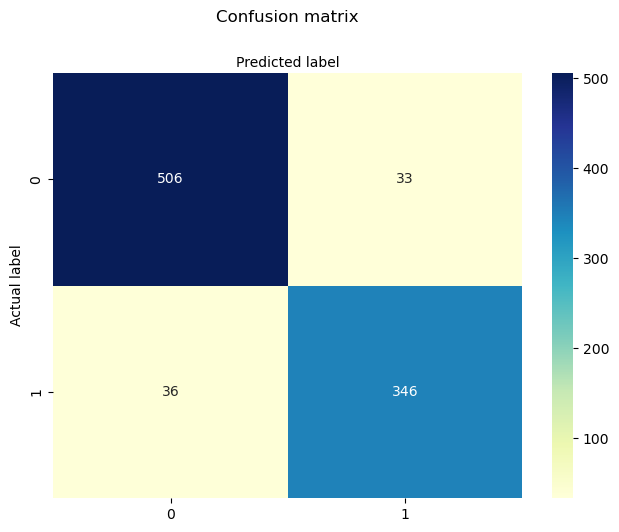

In [38]:
#visualizing the confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
from sklearn.metrics import classification_report
target_names = ['not spam', 'spam']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    not spam       0.93      0.94      0.94       539
        spam       0.91      0.91      0.91       382

    accuracy                           0.93       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



In [40]:
import matplotlib.pyplot as plt


# Prédiction sur l'ensemble d'entraînement et de validation
y_train_pred = logistic_model_v1.predict(X_train)

y_test_pred = logistic_model_v1.predict(X_test)

# Calcul de l'accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy}")

print(f"Accuracy sur l'ensemble de validation : {test_accuracy}")

Accuracy sur l'ensemble d'entraînement : 0.9304347826086956
Accuracy sur l'ensemble de validation : 0.9250814332247557


### ROC Curve 

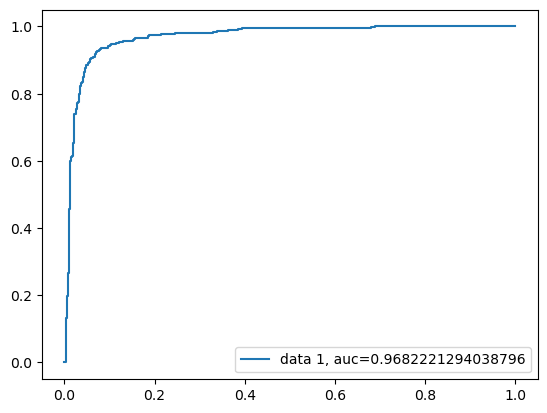

In [41]:
y_pred_proba = logistic_model_v1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Validation croisée 
Nous allons utilisé **GridSearchCV**  pour trouver les meilleurs hyperparamètres d'un modèle tout en utilisant la validation croisée pour évaluer les performances. 

In [42]:
from sklearn.model_selection import GridSearchCV
#model
logistic_model = LogisticRegression()

# Grille des hyperparamètres à explorer
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear'],
    'max_iter': [500, 1000]
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=6, scoring='accuracy')

# Exécution de la recherche par grille avec validation croisée
grid_search.fit(X_train, y_train)

# Récupération des meilleurs hyperparamètres et du meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres :", best_params)
print("Meilleur score obtenu :", best_score)

Meilleurs hyperparamètres : {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Meilleur score obtenu : 0.9317904859070483


Choix final des hyperparams

In [43]:
logistic_model = LogisticRegression(penalty='l1', max_iter=500, solver='liblinear', C=10, random_state=16).fit(X_train, y_train)

Evaluation du modèle finale 

Text(0.5, 427.9555555555555, 'Predicted label')

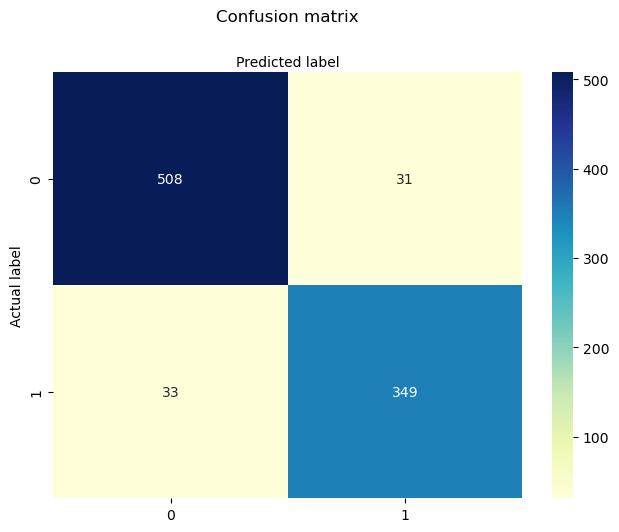

In [44]:
import seaborn as sns
y_pred = logistic_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [45]:
target_names = ['not spam', 'spam']
accuracy_LR_test = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy_LR_test)
print(classification_report(y_test, y_pred, target_names=target_names))


Précision du modèle : 0.9305103148751357
              precision    recall  f1-score   support

    not spam       0.94      0.94      0.94       539
        spam       0.92      0.91      0.92       382

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



In [46]:
import matplotlib.pyplot as plt


# Prédiction sur l'ensemble d'entraînement et de validation
y_train_pred = logistic_model.predict(X_train)

y_test_pred = logistic_model.predict(X_test)

# Calcul de l'accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy sur l'ensemble d'entraînement : {train_accuracy}")

print(f"Accuracy sur l'ensemble de validation : {test_accuracy}")

Accuracy sur l'ensemble d'entraînement : 0.9353260869565218
Accuracy sur l'ensemble de validation : 0.9305103148751357


ROC Curve

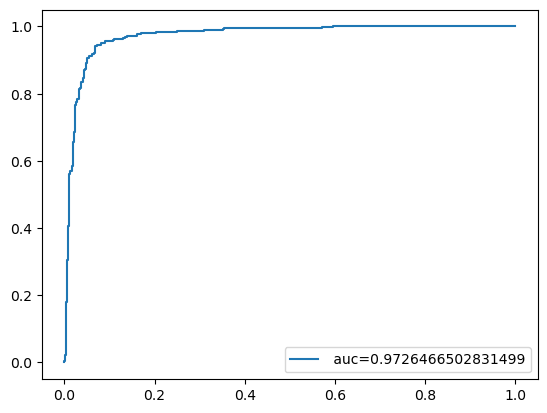

In [47]:
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

- Resumé :

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score
models=[logistic_model_v1,logistic_model]
y_pred_v1=logistic_model_v1.predict(X_test)
y_pred_v2=logistic_model.predict(X_test)
y_pred=[y_pred_v1,y_pred_v2]
Metrics=pd.DataFrame({
    i:[accuracy_score(y_test,j),
    precision_score(j,y_test),
    recall_score(j, y_test),
    f1_score(j,y_test)] 
    for i,j in zip (models,y_pred)},
    index=['Accuracy','Precision','Recall','F1'])
Metrics

,"LogisticRegression(C=0.1, max_iter=1000, random_state=16)","LogisticRegression(C=10, max_iter=500, penalty='l1', random_state=16,\n solver='liblinear')"
Accuracy,0.925081,0.930510
Precision,0.905759,0.913613
Recall,0.912929,0.918421
F1,0.909330,0.916010


<b><font color=red> Résultat : </font></b>

- Après que nous avons utilisé la validation croisée nous avons eu des meilleurs résultats.

# Gradient boosting

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_test)

# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GB_test = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GB_test)
print("Rapport de classification :\n", report)


Précision du modèle : 0.9413680781758957
Rapport de classification :
               precision    recall  f1-score   support

    not spam       0.95      0.96      0.95       580
        spam       0.93      0.91      0.92       341

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.94       921
weighted avg       0.94      0.94      0.94       921



### Entrainement avec X_pca

In [51]:
X_train_PCA, X_test_PCA, y_train, y_test = train_test_split(X_pca, y, train_size=0.8)

In [52]:
# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model_PCA = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model_PCA.fit(X_train_PCA, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_test_PCA)

# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GBPCA_test = accuracy_score(y_test, y_pred)
report1 = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GBPCA_test)
print("Rapport de classification :\n", report1)


c:\Users\zaiss\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Précision du modèle : 0.6178067318132465
Rapport de classification :
               precision    recall  f1-score   support

    not spam       0.64      0.90      0.75       588
        spam       0.40      0.12      0.19       333

    accuracy                           0.62       921
   macro avg       0.52      0.51      0.47       921
weighted avg       0.56      0.62      0.55       921



### Normalisation des données 

In [53]:
from sklearn.preprocessing import StandardScaler

# Créez un objet StandardScaler
scaler = StandardScaler()
X_norm=scaler.fit_transform(X_pca)
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.8)

In [54]:
# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model_norm = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model_norm.fit(X_norm_train, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_norm_test)

# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GBnorm_test = accuracy_score(y_test, y_pred)
report2 = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GBnorm_test)
print("Rapport de classification :\n", report2)


Précision du modèle : 0.5787187839305103
Rapport de classification :
               precision    recall  f1-score   support

    not spam       0.60      0.87      0.71       550
        spam       0.43      0.15      0.22       371

    accuracy                           0.58       921
   macro avg       0.52      0.51      0.46       921
weighted avg       0.53      0.58      0.51       921



c:\Users\zaiss\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


# Evaluating the Three best models :

In [55]:
print(f'accuracy logistic regression :{accuracy_LR_test},accuracy DNN {accuracy_DNN}, accuracy Gradient boosting {accuracy_GB_test}')

accuracy logistic regression :0.9305103148751357,accuracy DNN 0.9239956736564636, accuracy Gradient boosting 0.9413680781758957


In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score
models=[model1,logistic_model,gradient_boosting_model]
y_pred_model=model1.predict(X_test)
y_pred_model = (y_pred_model > 0.5).astype(int)
y_pred_logistic=logistic_model.predict(X_test)
y_pred_gradb=gradient_boosting_model.predict(X_test)

y_pred=[y_pred_model,y_pred_logistic, y_pred_gradb]
Metrics=pd.DataFrame({
    str(i):[accuracy_score(y_test,j),
    precision_score(j,y_test),
    recall_score(j, y_test),
    f1_score(j,y_test)] 
    for i,j in zip (models,y_pred)},
    index=['Accuracy','Precision','Recall','F1'])
Metrics

29/29 [==============================] - 2s 4ms/step


,<keras.src.engine.sequential.Sequential object at 0x0000021C6B528AD0>,"LogisticRegression(C=10, max_iter=500, penalty='l1', random_state=16,\n solver='liblinear')",GradientBoostingClassifier(random_state=42)
Accuracy,0.517915,0.504886,0.496200
Precision,0.307278,0.331536,0.323450
Recall,0.378738,0.371601,0.360360
F1,0.339286,0.350427,0.340909
